Hi, everyone. I'm Chatchaphon (Aey) from Thailand.  
This is my first kaggle kernel.  
If you like, please upvote and share it.  
Thank you!

## Problem Statement
Can we find more deeply and sensitive insight about potential customer, when we're clustering customer segmentation with "DBSCAN" algorithm?

**About "DBSCAN" **   
DBSCAN is density-based clustering algorithm that robust to outliers (noises).

In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

['Mall_Customers.csv']


## Explore the data

In [30]:
df = pd.read_csv('../input/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [32]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Find insight between Male and Female

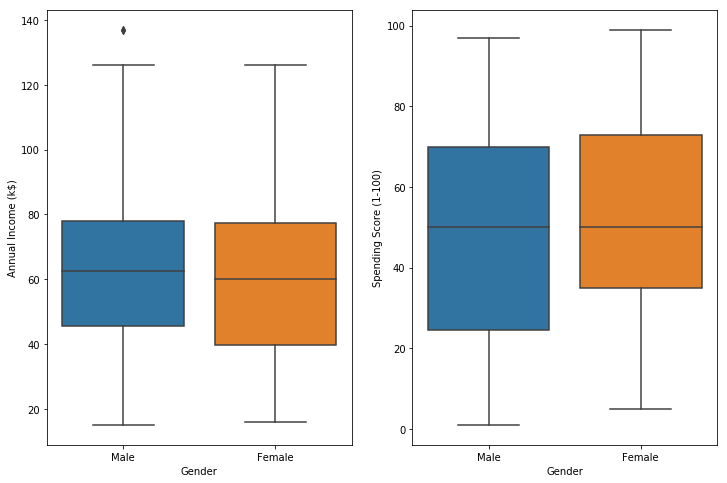

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))

sns.boxplot(x="Gender", y="Annual Income (k$)", data=df, orient='v' , ax=axes[0])
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, orient='v' , ax=axes[1])

Women look spend more than men. Let's focus on "Female"!

## Grouping Data with "Female"

In [34]:
df_group_one = df[['Gender','Annual Income (k$)','Spending Score (1-100)']]
df_group_one.groupby(['Gender'],as_index=False).mean()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Female,59.250000,51.526786
1,Male,62.227273,48.511364


In [35]:
df_female = df[df['Gender'] == "Female"]
print(df_female.shape)
df_female.head()

(112, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [36]:
Percentage = (df_female.shape[0]/df.shape[0])*100
print('Female Percentage: ', round(Percentage), '%')

Female Percentage:  56 %


## Compute DBSCAN
I am setting with a little so densy. Thus more noises will appear, but we can find a lot more insight with very sensitive result.  
> eps=0.5, min_samples=4

In [37]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = df_female[['Age','Annual Income (k$)','Spending Score (1-100)']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_female['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
print(df_female[['Age','Annual Income (k$)','Spending Score (1-100)','Clus_Db']].head())

# number of labels
print("number of labels: ", set(labels))

   Age  Annual Income (k$)  Spending Score (1-100)  Clus_Db
2   20                  16                       6       -1
3   23                  16                      77        0
4   31                  17                      40       -1
5   22                  17                      76        0
6   35                  18                       6       -1
number of labels:  {0, 1, 2, 3, -1}


## Data Visualization

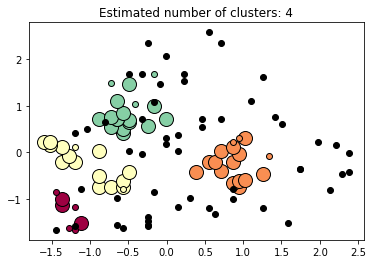

number of noise(s):  54


In [38]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

In [39]:
#Visualization
for clust_number in set(labels):
    clust_set = df_female[df_female.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg Age: '+ str(round(np.mean(clust_set.Age)))+\
               ', Avg Income: '+ str(round(np.mean(clust_set['Annual Income (k$)'])))+\
               ', Avg Spending: '+ str(round(np.mean(clust_set['Spending Score (1-100)'])))+', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Age: 22, Avg Income: 26, Avg Spending: 78, Count: 7
Cluster 1, Avg Age: 49, Avg Income: 54, Avg Spending: 50, Count: 17
Cluster 2, Avg Age: 25, Avg Income: 52, Avg Spending: 50, Count: 16
Cluster 3, Avg Age: 32, Avg Income: 82, Avg Spending: 82, Count: 18


## Conclusion
With tightly setting, we found that "Cluster 3 (average age: 32)" which highest average income and spending is the most potential customer group. The second candidate is "Cluster 0 (average age: 22)" which lowest average income but spending a lot. For some countries, "Cluster 3" will represent people who are being settled down (have a family) which spending most for their children. And "Cluster 0" will represent people who are starting a new work-life after graduated that spending most for their new society life.  
  
This analysis is only focus on women. Maybe men have a little difference insight.   
Please try to find it, and share with me!